# Libraries Importing

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,classification_report
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

# Problem statement
ONGCF is an oil and natural gas organization. It has data available for price at a weekly level. It wants to predict the price for crude oil for the next 16 months, starting from 1st Jan 2019 to April 2020. Forecast the prices based upon the best model as per your choice.

# Data Gathering

In [12]:
df=pd.read_csv('train_data.csv')
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


# EDA

Here we can observe that we have two columns one is independent and other is dependent and 813 rows.

In [13]:
df.shape 

(813, 2)

In [20]:
df.columns

Index(['Date', 'Petrol (USD)'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


Features
- Date :- It contains the date.
- Petrol:- It contains the price of petrol on that particular date. 

In [16]:
df.isna().sum()

Date            0
Petrol (USD)    2
dtype: int64

- Here we can found two null values in the Petrol Feature.
- We can impute that null values with KNNImputer.

We need to Extract the date,month,year from Date column

In [23]:
df['New_Date']=pd.to_datetime(df['Date'])

In [24]:
df['Day']=df['New_Date'].dt.day

In [25]:
df['Month']=df['New_Date'].dt.month

In [26]:
df['Year']=df['New_Date'].dt.year

In [27]:
df.head()

,Date,Petrol (USD),New_Date,Day,Month,Year
0,6/9/2003,74.59,2003-06-09,9,6,2003
1,6/16/2003,74.47,2003-06-16,16,6,2003
2,6/23/2003,74.42,2003-06-23,23,6,2003
3,6/30/2003,74.35,2003-06-30,30,6,2003
4,7/7/2003,74.28,2003-07-07,7,7,2003


In [28]:
df.drop('Date',axis=1,inplace=True)

In [30]:
df.drop('New_Date',axis=1,inplace=True)

In [32]:
df.rename({'Day':'Date'},axis=1,inplace=True)

In [33]:
df.head()

,Petrol (USD),Date,Month,Year
0,74.59,9,6,2003
1,74.47,16,6,2003
2,74.42,23,6,2003
3,74.35,30,6,2003
4,74.28,7,7,2003


# Feture Engineering

#### Null Value imputation by KNNImputer

In [36]:
knn_imp=KNNImputer()
array=knn_imp.fit_transform(df)
df=pd.DataFrame(array,columns=df.columns)

In [37]:
df.isna().sum()

Petrol (USD)    0
Date            0
Month           0
Year            0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petrol (USD)  813 non-null    float64
 1   Date          813 non-null    float64
 2   Month         813 non-null    float64
 3   Year          813 non-null    float64
dtypes: float64(4)
memory usage: 25.5 KB


In [39]:
df.describe()

,Petrol (USD),Date,Month,Year
count,813.000000,813.000000,813.000000,813.000000
mean,110.280226,15.776138,6.612546,2010.709717
std,19.244149,8.809649,3.445021,4.504717
min,74.210000,1.000000,1.000000,2003.000000
25%,94.410000,8.000000,4.000000,2007.000000
50%,112.370000,16.000000,7.000000,2011.000000
75%,128.550000,23.000000,10.000000,2015.000000
max,189.510000,31.000000,12.000000,2018.000000


In [68]:
df.corr()

,Petrol (USD),Date,Month,Year
Petrol (USD),1.000000,0.009156,0.018663,0.698858
Date,0.009156,1.000000,0.005132,-0.005022
Month,0.018663,0.005132,1.000000,-0.045982
Year,0.698858,-0.005022,-0.045982,1.000000


<AxesSubplot:>

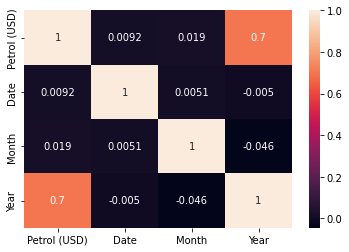

In [70]:
sns.heatmap(df.corr(),annot=True)

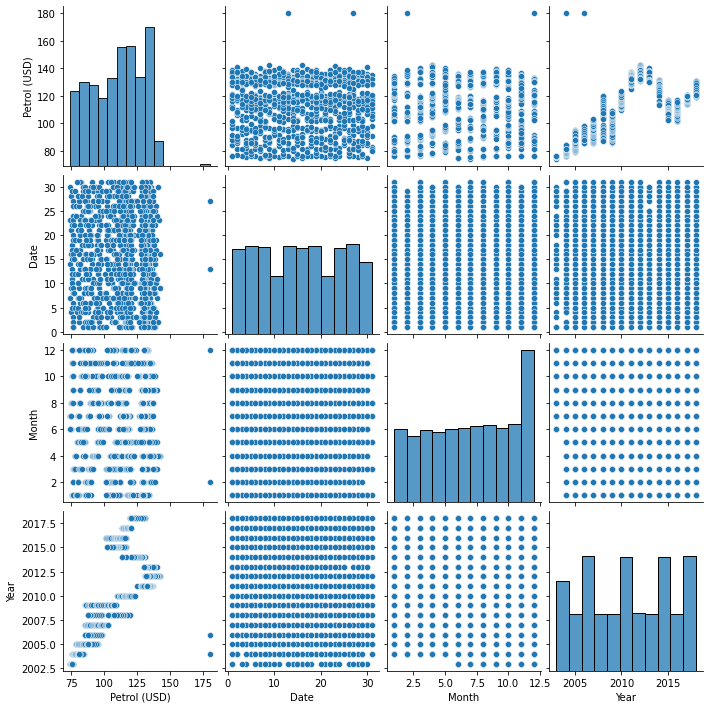

In [73]:
sns.pairplot(df)

In [41]:
df.columns

Index(['Petrol (USD)', 'Date', 'Month', 'Year'], dtype='object')

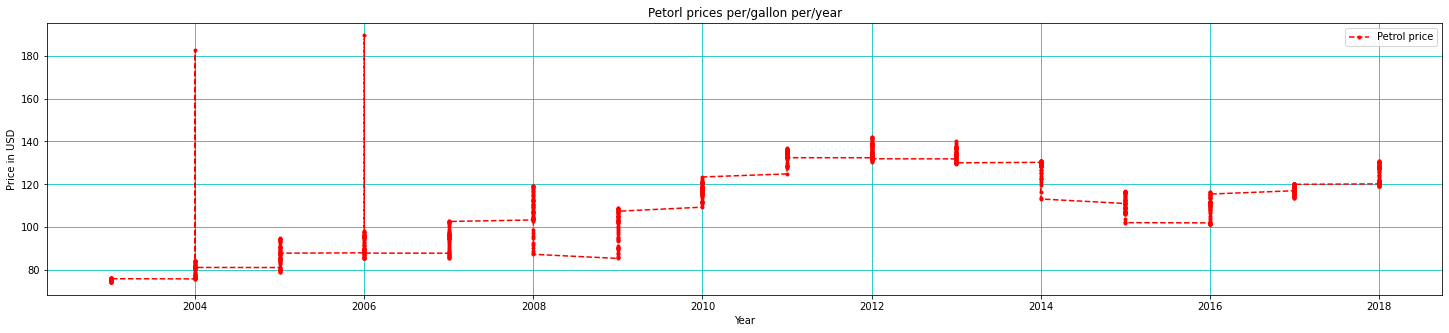

In [56]:
plt.figure(figsize=(25,5))
plt.plot(df['Year'],df['Petrol (USD)'],'r.--',label="Petrol price")
plt.title("Petorl prices per/gallon per/year")
plt.xlabel("Year")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(color='c')

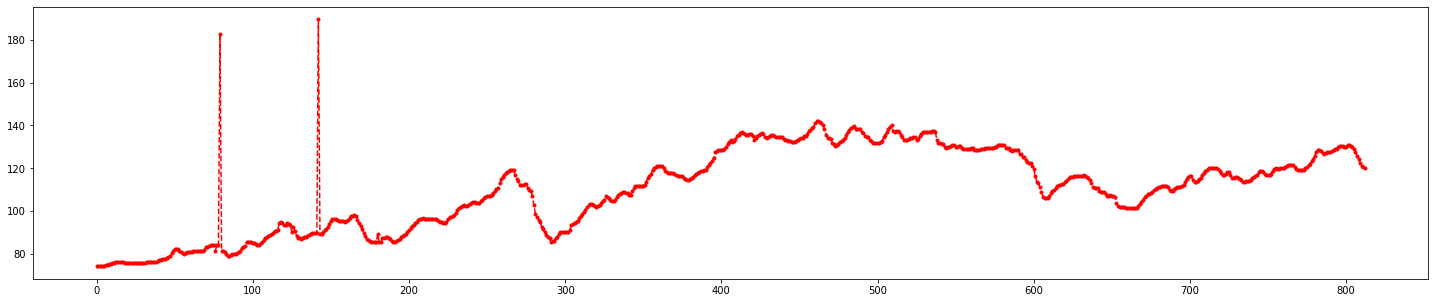

In [59]:
plt.figure(figsize=(25,5))
plt.plot(df['Petrol (USD)'],'r.--',label="Petrol price")

<AxesSubplot:>

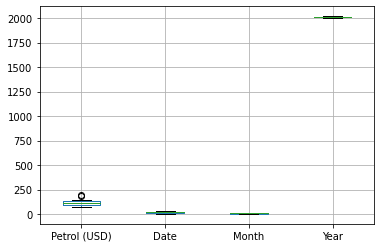

In [57]:
df.boxplot()

In [60]:
df.columns

Index(['Petrol (USD)', 'Date', 'Month', 'Year'], dtype='object')

In [61]:
q1=df['Petrol (USD)'].quantile(0.25)
q3=df['Petrol (USD)'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1+1.5*iqr
print("Q1:-",q1)
print("Q3:-",q3)
print("UPPER TAIL:-",upper_tail)
print("LOWER TAIL:-",lower_tail)

Q1:- 94.41
Q3:- 128.55
UPPER TAIL:- 179.76000000000005
LOWER TAIL:- 145.62


In [65]:
df.loc[df['Petrol (USD)']>upper_tail]

,Petrol (USD),Date,Month,Year
79,182.73,13.0,12.0,2004.0
142,189.51,27.0,2.0,2006.0


In [66]:
df.loc[df['Petrol (USD)']>upper_tail,'Petrol (USD)']=upper_tail

In [67]:
df.loc[df['Petrol (USD)']>upper_tail]

,Petrol (USD),Date,Month,Year


# Train Test Split

In [118]:
x=df.drop('Petrol (USD)',axis=1)
y=df['Petrol (USD)']

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

## Without Feature Scaling / Without Hyperparameter Tuning.

### Linear Regression

In [78]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [79]:
display("Model Evaluation on Training data")
y_pred=l_model.predict(x_train)
r2=r2_score(y_train,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_train,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Training data'

R-Squared:- 0.4839535895670509
**********************************************************************
Mean Absolute error:- 11.332687510817161
**********************************************************************
Mean squared error:- 188.79611405940435
**********************************************************************
Root Mean Squared Error:- 13.740309823996123


In [80]:
display("Model Evaluation on Testing data")
y_pred=l_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Testing data'

R-Squared:- 0.516768864424495
**********************************************************************
Mean Absolute error:- 11.74184246310886
**********************************************************************
Mean squared error:- 180.35526949080057
**********************************************************************
Root Mean Squared Error:- 13.429641450567493


# KNN 

In [85]:
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [86]:
display("Model Evaluation on Training data")
y_pred=knn_model.predict(x_train)
r2=r2_score(y_train,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_train,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Training data'

R-Squared:- 0.8309121629015299
**********************************************************************
Mean Absolute error:- 5.442671384615385
**********************************************************************
Mean squared error:- 61.86096043593849
**********************************************************************
Root Mean Squared Error:- 7.865173897374329


In [87]:
display("Model Evaluation on Testing data")
y_pred=knn_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Testing data'

R-Squared:- 0.8282317664858561
**********************************************************************
Mean Absolute error:- 6.267170552147241
**********************************************************************
Mean squared error:- 64.10867132662578
**********************************************************************
Root Mean Squared Error:- 8.006789077191042


### Decision Tree

In [120]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [121]:
display("Model Evaluation on Training data")
y_pred=dt_model.predict(x_train)
r2=r2_score(y_train,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_train,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Training data'

R-Squared:- 1.0
**********************************************************************
Mean Absolute error:- 0.0
**********************************************************************
Mean squared error:- 0.0
**********************************************************************
Root Mean Squared Error:- 0.0


In [123]:
display("Model Evaluation on Testing data")
y_pred=dt_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Testing data'

R-Squared:- 0.9939124769930441
**********************************************************************
Mean Absolute error:- 0.9050920245398765
**********************************************************************
Mean squared error:- 2.2720325153374237
**********************************************************************
Root Mean Squared Error:- 1.5073262803180416


### Random Forest

In [126]:
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [127]:
display("Model Evaluation on Training data")
y_pred=rf_reg.predict(x_train)
r2=r2_score(y_train,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_train,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Training data'

R-Squared:- 0.9833918380744527
**********************************************************************
Mean Absolute error:- 0.6563291692307668
**********************************************************************
Mean squared error:- 6.076113252259692
**********************************************************************
Root Mean Squared Error:- 2.4649773330113387


In [128]:
display("Model Evaluation on Testing data")
y_pred=rf_reg.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Testing data'

R-Squared:- 0.9897081796830731
**********************************************************************
Mean Absolute error:- 1.199176073619628
**********************************************************************
Mean squared error:- 3.8411929409300662
**********************************************************************
Root Mean Squared Error:- 1.9598961556495962


## With Feature Scaling / Without Hyperparameter Tuning.

In [92]:
std_scalar=StandardScaler()
array=std_scalar.fit_transform(x)
x_scale=pd.DataFrame(array,columns=x.columns)
x_scale.head()

,Date,Month,Year
0,-0.769646,-0.177916,-1.71253
1,0.025427,-0.177916,-1.71253
2,0.820499,-0.177916,-1.71253
3,1.615571,-0.177916,-1.71253
4,-0.996809,0.112537,-1.71253


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=11)

### Linear Regression

In [94]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [95]:
display("Model Evaluation on Training data")
y_pred=l_model.predict(x_train)
r2=r2_score(y_train,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_train,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Training data'

R-Squared:- 0.48395358956705226
**********************************************************************
Mean Absolute error:- 11.332687510817218
**********************************************************************
Mean squared error:- 188.79611405940386
**********************************************************************
Root Mean Squared Error:- 13.740309823996105


In [96]:
display("Model Evaluation on Testing data")
y_pred=l_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Testing data'

R-Squared:- 0.5167688644244962
**********************************************************************
Mean Absolute error:- 11.741842463108927
**********************************************************************
Mean squared error:- 180.35526949080008
**********************************************************************
Root Mean Squared Error:- 13.429641450567475


### KNN

In [97]:
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [98]:
display("Model Evaluation on Training data")
y_pred=knn_model.predict(x_train)
r2=r2_score(y_train,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_train,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Training data'

R-Squared:- 0.845169070403656
**********************************************************************
Mean Absolute error:- 4.90662523076923
**********************************************************************
Mean squared error:- 56.64505605120004
**********************************************************************
Root Mean Squared Error:- 7.5262909890064735


In [100]:
display("Model Evaluation on Testing data")
y_pred=knn_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Testing data'

R-Squared:- 0.8256374115108496
**********************************************************************
Mean Absolute error:- 6.104012269938652
**********************************************************************
Mean squared error:- 65.07695659680985
**********************************************************************
Root Mean Squared Error:- 8.06702898202367


### Decision Tree

In [101]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [102]:
display("Model Evaluation on Training data")
y_pred=dt_model.predict(x_train)
r2=r2_score(y_train,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_train,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Training data'

R-Squared:- 1.0
**********************************************************************
Mean Absolute error:- 0.0
**********************************************************************
Mean squared error:- 0.0
**********************************************************************
Root Mean Squared Error:- 0.0


In [103]:
display("Model Evaluation on Testing data")
y_pred=dt_model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Testing data'

R-Squared:- 0.9933828804593821
**********************************************************************
Mean Absolute error:- 0.9474233128834346
**********************************************************************
Mean squared error:- 2.46969263803681
**********************************************************************
Root Mean Squared Error:- 1.5715255766409943


### Random Forest

In [104]:
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [105]:
display("Model Evaluation on Training data")
y_pred=rf_reg.predict(x_train)
r2=r2_score(y_train,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_train,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Training data'

R-Squared:- 0.9830078884470987
**********************************************************************
Mean Absolute error:- 0.670227076923071
**********************************************************************
Mean squared error:- 6.216581621331691
**********************************************************************
Root Mean Squared Error:- 2.493307365996357


In [106]:
display("Model Evaluation on Testing data")
y_pred=rf_reg.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R-Squared:-",r2)
print("*"*70)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute error:-",mae)
print("*"*70)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:-",mse)
print("*"*70)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:-",rmse)

'Model Evaluation on Testing data'

R-Squared:- 0.9870205122564016
**********************************************************************
Mean Absolute error:- 1.2425296932515326
**********************************************************************
Mean squared error:- 4.844305007501855
**********************************************************************
Root Mean Squared Error:- 2.200978193327198


# Accuracy Analysis

In [115]:
result_dict = {'accuracy_train':[48,83,100,98.5,48.6,84.45,100,98.3],'accuracy_test': [51,82,99.88,98.88,51.67,83.55,99.33,98.7]}
index = ['Linear_Regession','KNN','Decision_Tree','Random_Forest','Linear_Regession_with_scaling','KNN_with_scaling','Decision_Tree_with_scaling','Random_forest_with_scaling']

In [116]:
df1=pd.DataFrame(result_dict,index=index)
df1

,accuracy_train,accuracy_test
Linear_Regession,48.00,51.00
KNN,83.00,82.00
Decision_Tree,100.00,99.88
Random_Forest,98.50,98.88
Linear_Regession_with_scaling,48.60,51.67
KNN_with_scaling,84.45,83.55
Decision_Tree_with_scaling,100.00,99.33
Random_forest_with_scaling,98.30,98.70


<AxesSubplot:>

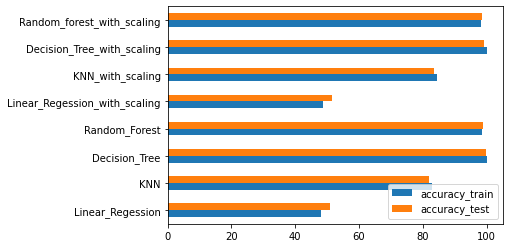

In [117]:
df1.plot(kind='barh')

### So,we are selecting Decision Tree Model without Feature scaling with testing accuracy = 99.88%

### Model Checking

In [130]:
x.head(1).T

,0
Date,9.0
Month,6.0
Year,2003.0


In [148]:
Date=15
Month=12
Year=2019

In [149]:
array=np.zeros(len(x.columns))
array[0]=Date
array[1]=Month
array[2]=Year
pred=dt_model.predict([array])[0]
print("Predicted price of the Petrol:-",pred,"$")

Predicted price of the Petrol:- 121.02 $


In [150]:
import pickle 
with open('Petrol_model.pkl','wb')as f:
    pickle.dump(dt_model,f)